In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection 

In [3]:
all_data = pd.read_feather(r"C:\Users\DELL\OneDrive\Desktop\P4DS4D2\Sales_data.ftr")

In [4]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [8]:
all_data.shape

(186850, 6)

In [6]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [31]:
all_data = all_data.dropna(how= "all")

In [32]:
all_data.shape

(185686, 7)

In [33]:
all_data.duplicated()

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 185686, dtype: bool

In [12]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [24]:
all_data = all_data.drop_duplicates()

In [13]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [14]:
all_data['Order Date']

0         04/19/19 08:46
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
5         04/30/19 09:27
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: Order Date, Length: 186305, dtype: object

In [16]:
type(all_data['Order Date'][0])

str

In [17]:
all_data['Order Date'].str.split('/')

0         [04, 19, 19 08:46]
2         [04, 07, 19 22:30]
3         [04, 12, 19 14:38]
4         [04, 12, 19 14:38]
5         [04, 30, 19 09:27]
                 ...        
186845    [09, 17, 19 20:56]
186846    [09, 01, 19 16:00]
186847    [09, 23, 19 07:39]
186848    [09, 19, 19 17:30]
186849    [09, 30, 19 00:18]
Name: Order Date, Length: 186305, dtype: object

In [18]:
all_data['Month'] = all_data['Order Date'].str.split('/').str[0]

In [19]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [20]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [27]:
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [26]:
filter1 = all_data['Month'] == 'Order Date'

In [25]:
all_data[filter1]

C:\Users\DELL\AppData\Local\Temp\ipykernel_21976\2629320732.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_data[filter1]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [28]:
all_data = all_data[~filter1]

In [29]:
all_data.shape

(185686, 7)

In [35]:
all_data['Month'] = all_data['Month'].astype(int)

In [36]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [37]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(float)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [38]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [40]:
all_data['Sales'] =  all_data['Quantity Ordered'] * all_data['Price Each']

In [41]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00


In [42]:
all_data.groupby('Month')['Sales'].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Sales, dtype: float64

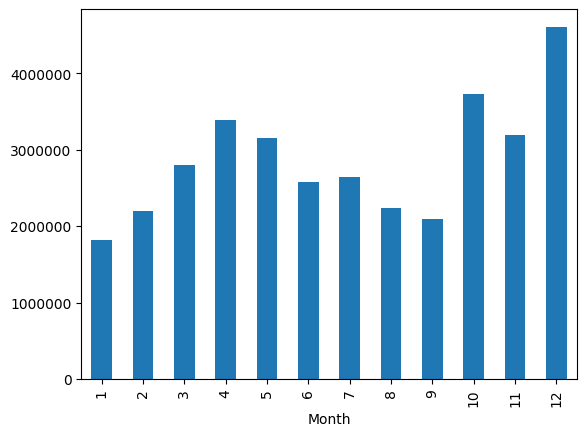

In [44]:
all_data.groupby('Month')['Sales'].sum().plot(kind= "bar")
plt.ticklabel_format(style='plain', axis= 'y')

In [45]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [47]:
all_data['Purchase Address'][0].split(',')[1]

' Dallas'

In [49]:
all_data['city'] =  all_data['Purchase Address'].str.split(',').str.get(1)

In [50]:
all_data['city']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: city, Length: 185686, dtype: object

In [51]:
pd.value_counts(all_data['city'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_21976\2119930960.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(all_data['city'])


city
 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: count, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_21976\3433797208.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(all_data['city']).plot(kind= 'pie', autopct= '%1.0f%%')


<Axes: ylabel='count'>

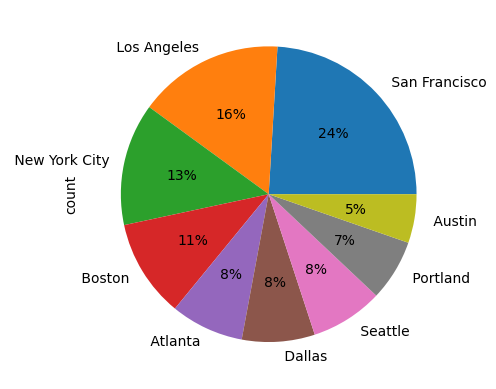

In [53]:
pd.value_counts(all_data['city']).plot(kind= 'pie', autopct= '%1.0f%%')

In [54]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'city'],
      dtype='object')

In [56]:
count_df = all_data.groupby(['Product']).agg({'Quantity Ordered' : 'sum', 'Price Each' : 'mean'})

In [57]:
count_df

,Quantity Ordered,Price Each
Product,,
20in Monitor,4126.0,109.99
27in 4K Gaming Monitor,6239.0,389.99
27in FHD Monitor,7541.0,149.99
34in Ultrawide Monitor,6192.0,379.99
AA Batteries (4-pack),27615.0,3.84
AAA Batteries (4-pack),30986.0,2.99
Apple Airpods Headphones,15637.0,150.00
Bose SoundSport Headphones,13430.0,99.99
Flatscreen TV,4813.0,300.00


In [63]:
products = count_df['Product'].values

In [58]:
count_df = count_df.reset_index()

C:\Users\DELL\AppData\Local\Temp\ipykernel_21976\2672991039.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation= 'vertical', fontsize= 8)


Text(0, 0.5, 'Avg price of products')

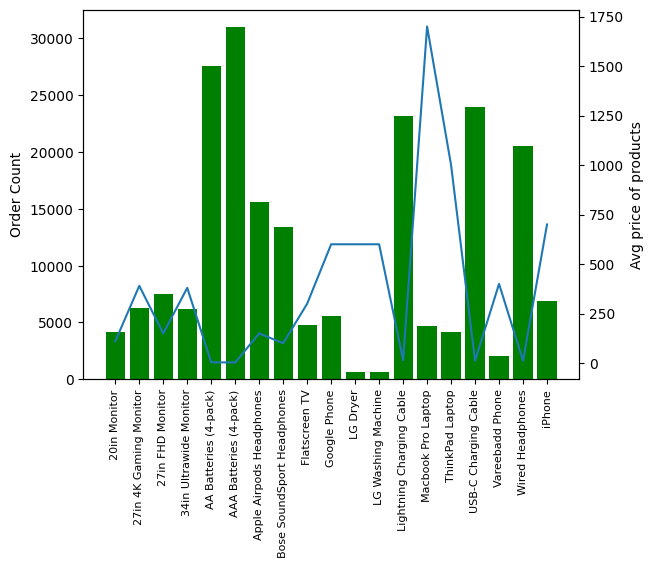

In [65]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(count_df['Product'], count_df['Quantity Ordered'], color= 'g')
ax2.plot(count_df['Product'], count_df['Price Each'])
ax1.set_xticklabels(products, rotation= 'vertical', fontsize= 8)

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price of products')

In [68]:
all_data['Product'].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [69]:
most_sold_product = all_data['Product'].value_counts()[0:5].index

In [70]:
all_data['Product'].isin(most_sold_product)

0          True
2         False
3         False
4          True
5          True
          ...  
186845     True
186846    False
186847    False
186848    False
186849     True
Name: Product, Length: 185686, dtype: bool

In [72]:
most_sold_product_df = all_data[all_data['Product'].isin(most_sold_product)]

In [73]:
most_sold_product_df.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1.0,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco


In [74]:
most_sold_product_df.groupby(['Month','Product']).size()

Month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [76]:
pivot = most_sold_product_df.groupby(['Month','Product']).size().unstack()

<Axes: xlabel='Month'>

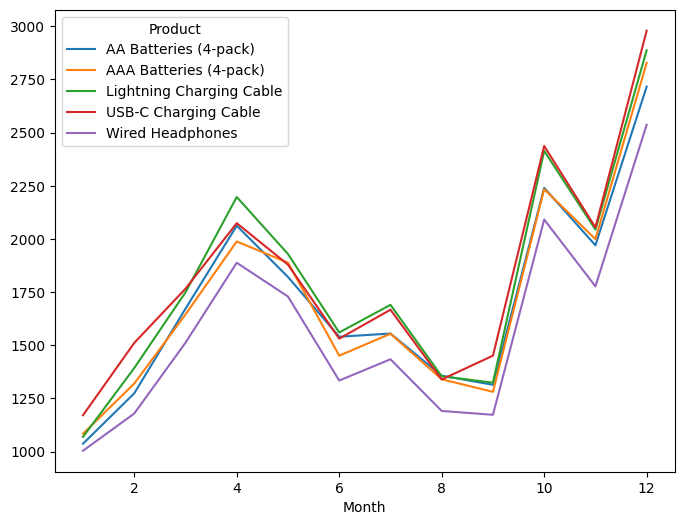

In [77]:
pivot.plot(figsize= (8,6))

In [78]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'city'],
      dtype='object')

In [79]:
all_data['Order ID']

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185686, dtype: object

In [82]:
df_duplicated = all_data[all_data['Order ID'].duplicated(keep=False)]

In [83]:
df_duplicated

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2.0,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1.0,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1.0,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2.0,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1.0,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [86]:
dup_products = df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x : ','.join(x)).reset_index().rename(columns={'Product' : 'grouped_products'})

In [87]:
dup_products

,Order ID,grouped_products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [89]:
dup_products_df = df_duplicated.merge(dup_products, how='left', on='Order ID')

In [90]:
dup_products_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,grouped_products
0,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2.0,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1.0,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1.0,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2.0,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1.0,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,"Google Phone,USB-C Charging Cable"


In [92]:
no_dup_df = dup_products_df.drop_duplicates(subset=['Order ID'])

In [93]:
no_dup_df.shape

(6879, 10)

<Axes: ylabel='count'>

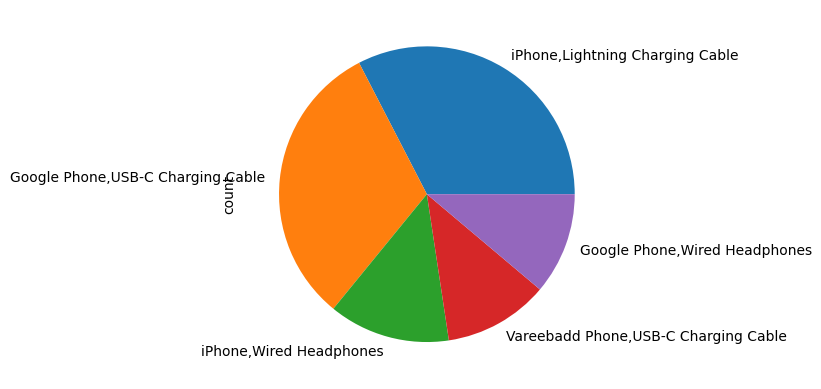

In [97]:
no_dup_df['grouped_products'].value_counts()[0:5].plot.pie()

In [98]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles


In [99]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Sales               float64
city                 object
dtype: object

In [100]:
pd.to_datetime(all_data['Order Date'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_21976\1622311587.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(all_data['Order Date'])


0        2019-04-19 08:46:00
2        2019-04-07 22:30:00
3        2019-04-12 14:38:00
4        2019-04-12 14:38:00
5        2019-04-30 09:27:00
                 ...        
186845   2019-09-17 20:56:00
186846   2019-09-01 16:00:00
186847   2019-09-23 07:39:00
186848   2019-09-19 17:30:00
186849   2019-09-30 00:18:00
Name: Order Date, Length: 185686, dtype: datetime64[ns]

In [102]:
all_data['Hour'] =  pd.to_datetime(all_data['Order Date']).dt.hour

C:\Users\DELL\AppData\Local\Temp\ipykernel_21976\2569031924.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hour'] =  pd.to_datetime(all_data['Order Date']).dt.hour


<Axes: xlabel='Hour'>

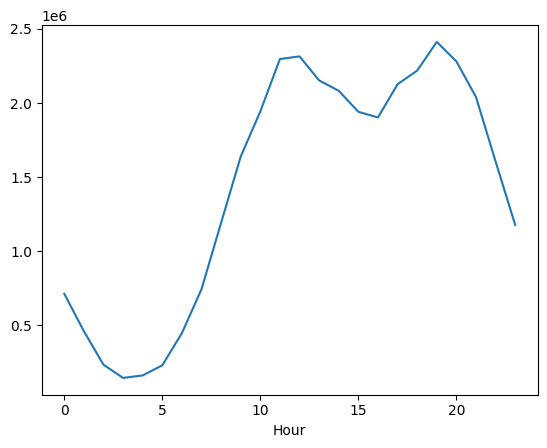

In [105]:
all_data.groupby('Hour')['Sales'].sum().plot()

In [106]:
pivot = all_data.pivot_table(index= "Hour", columns= 'city', values='Sales', aggfunc="sum")

In [107]:
pivot

city,Atlanta,Austin,Boston,Dallas,Los Angeles,New York City,Portland,San Francisco,Seattle
Hour,,,,,,,,,
0,62855.02,38095.54,77524.83,45103.93,106176.92,100208.77,46795.29,175921.20,60867.16
1,44443.32,20479.19,48987.45,35310.27,77638.97,71811.12,32359.77,97799.86,31733.95
2,25199.15,15070.52,22018.01,24782.04,34805.51,29175.02,17110.58,50964.17,15714.45
3,7018.49,5957.97,14219.26,14265.28,23673.84,16340.06,11592.08,42127.03,10548.93
4,18954.97,5412.40,21245.82,6769.99,22877.18,20139.72,9621.42,41175.81,16348.76
5,18477.55,12787.88,16447.00,17891.68,37931.63,40200.56,11836.02,53521.90,21570.65
6,39447.56,18528.47,54194.75,36909.89,66811.50,66249.66,34290.75,96635.83,34894.60
7,69861.95,40585.92,68517.54,67286.82,116219.27,101404.71,59898.95,168245.68,52046.48
8,106015.06,60812.95,144361.50,92531.24,172561.11,165058.15,73046.53,283928.39,93994.27


<Axes: xlabel='city', ylabel='Hour'>

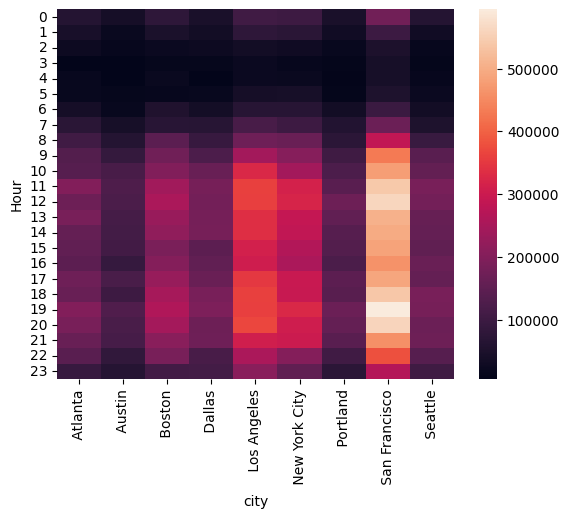

In [108]:
sns.heatmap(pivot)

In [109]:
import plotly.express as px

In [113]:
fig = px.imshow(pivot,
          labels= dict(x= "City", y= "Hour", color = "total Sales"),     
          x= pivot.columns,
          y= pivot.index,
          title= "Hourly Sales in City",
          color_continuous_scale= "inferno")

In [114]:
fig